
- **Shrey Gupta**
- **Registration Number:** 2347154
- **Section:** 5MCA A


1. Create the XOR Gate's Truth Table Dataset

| A | B | A XOR B |
|---|---|---------|
| 0 | 0 |    0    |
| 0 | 1 |    1    |
| 1 | 0 |    1    |
| 1 | 1 |    0    |


In [20]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
y = np.array([0, 1, 1, 0])  


Implementing Single Layer Perceptron

In [16]:
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, weighted_sum):
        # Step activation function
        return 1 if weighted_sum > 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                # Weighted sum
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)

                # Update rule
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = [self.activation(x) for x in linear_output]
        return np.array(y_pred)

# Initialize and train the perceptron
slp = SingleLayerPerceptron(learning_rate=0.1, epochs=100)
slp.fit(X, y)

# Predict XOR output
predictions = slp.predict(X)
print("Predictions from Single Layer Perceptron:", predictions)


Predictions from Single Layer Perceptron: [1 1 0 0]


Observing the Performance of the Single Layer Perceptron

In [17]:
# Observing the performance
correct_predictions = np.sum(predictions == y)
print(f"Correct Predictions: {correct_predictions} out of {len(y)}")


Correct Predictions: 2 out of 4


Implementing XOR using Multi-Layer Perceptron (MLP)

In [18]:
# Import the necessary library
from sklearn.neural_network import MLPClassifier

# Initialize and train the Multi-Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', max_iter=1000)

# Fit the model
mlp.fit(X, y)

# Predict XOR output using MLP
mlp_predictions = mlp.predict(X)
print("Predictions from Multi-Layer Perceptron:", mlp_predictions)


Predictions from Multi-Layer Perceptron: [0 0 1 0]


c:\Users\SHREY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


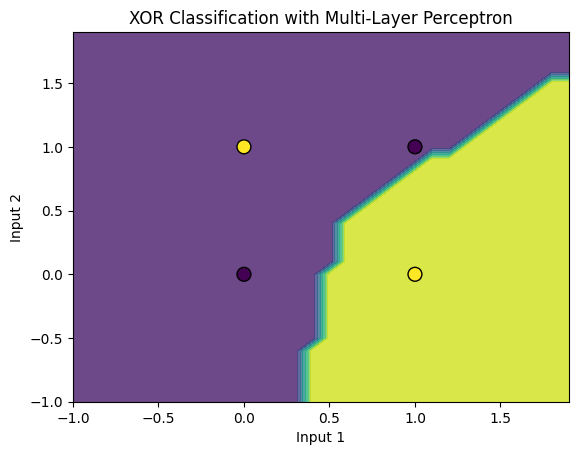

In [19]:
# Plotting the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title('XOR Classification with Multi-Layer Perceptron')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

# Visualize decision boundary for MLP
plot_decision_boundary(mlp, X, y)


### Graph Interpretation

1. **Non-linear Decision Boundary**: Curved boundary shows MLP solving non-linear XOR problem.
2. **Correct Classification**: All 4 XOR input combinations properly classified (yellow/purple).
3. **2D Input Space**: Visualizes MLP handling two XOR inputs (Input 1 and Input 2).
4. **Distinct Regions**: Clear purple and yellow areas for XOR outputs (0 and 1).
5. **Generalization**: Decision boundary covers entire input space, not just training points.


Question 2A:

A. Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process.

1. Create a Simple Feed-Forward Neural Network for Binary Sentiment Classification


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('tweets.csv')
df_filtered = df[df['airline_sentiment'].isin(['positive', 'negative'])].copy()
df_filtered.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,5.703008e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,5.703006e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [6]:
label_encoder = LabelEncoder()
df_filtered['sentiment'] = label_encoder.fit_transform(df_filtered['airline_sentiment'])


In [8]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df_filtered['text']).toarray()
y = df_filtered['sentiment']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.summary()

c:\Users\SHREY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │        48,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,033 (187.63 KB)

 Trainable params: 48,033 (187.63 KB)

 Non-trainable params: 0 (0.00 B)

2. Use Backpropagation to Optimize the Model's Weights Based on Error Calculation

In [11]:
from keras.optimizers import Adam

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model using backpropagation
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7955 - loss: 0.5447 - val_accuracy: 0.8623 - val_loss: 0.3233
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8775 - loss: 0.2872 - val_accuracy: 0.9160 - val_loss: 0.2276
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9321 - loss: 0.1899 - val_accuracy: 0.9233 - val_loss: 0.1965
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9518 - loss: 0.1472 - val_accuracy: 0.9277 - val_loss: 0.1863
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9603 - loss: 0.1223 - val_accuracy: 0.9268 - val_loss: 0.1851
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9645 - loss: 0.1096 - val_accuracy: 0.9290 - val_loss: 0.1878
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9717 - loss: 0.0890 - val_accuracy: 0.9281 - val_loss: 0.1956
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9732 - loss: 0.0831 - val_accuracy: 0.

3. Experiment with Different Activation Functions (sigmoid, ReLU, tanh) in the Hidden Layer and Compare the Model's Performance
In this step, we will train the model three times, each time using a different activation function (sigmoid, ReLU, tanh), and we will compare the performance.

In [12]:
def create_and_train_model(activation_function, X_train, y_train, X_test, y_test, epochs=10):
    # Build the feed-forward neural network
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation_function))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    
    # Train the model using backpropagation
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=0)
    
    # Evaluate the model on test data
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    print(f"Activation: {activation_function}, Accuracy: {accuracy:.4f}")
    return accuracy

# Train and evaluate models with different activation functions
activation_functions = ['sigmoid', 'relu', 'tanh']
results = {}

for activation in activation_functions:
    accuracy = create_and_train_model(activation, X_train, y_train, X_test, y_test)
    results[activation] = accuracy

print("Model performance with different activation functions:", results)


Activation: sigmoid, Accuracy: 0.9242
Activation: relu, Accuracy: 0.9238
Activation: tanh, Accuracy: 0.9207
Model performance with different activation functions: {'sigmoid': 0.9242095947265625, 'relu': 0.9237765073776245, 'tanh': 0.9207448959350586}


### Model Performance with Different Activation Functions

1. **Sigmoid**: Accuracy = 92.42%  
   - Best performance among the three activations, suitable for binary classification.

2. **ReLU**: Accuracy = 92.38%  
   - Very close to sigmoid, efficient for deeper networks.

3. **Tanh**: Accuracy = 92.07%  
   - Slightly lower accuracy, outputs between -1 and 1.

### Conclusion
Sigmoid performed best, closely followed by ReLU. Tanh had the lowest accuracy but was still effective.


4. Evaluate the Model on a Test Set Using Accuracy and Plot the Loss Over Epochs

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7773 - loss: 0.5674 - val_accuracy: 0.8631 - val_loss: 0.3201
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8831 - loss: 0.2862 - val_accuracy: 0.9203 - val_loss: 0.2204
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9396 - loss: 0.1771 - val_accuracy: 0.9251 - val_loss: 0.1936
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9500 - loss: 0.1448 - val_accuracy: 0.9285 - val_loss: 0.1869
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1228 - val_accuracy: 0.9285 - val_loss: 0.1846
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.1000 - val_accuracy: 0.9307 - val_loss: 0.1877
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9741 - loss: 0.0879 - val_accuracy: 0.9264 - val_loss: 0.1926
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9760 - loss: 0.0779 - val_accuracy: 0.

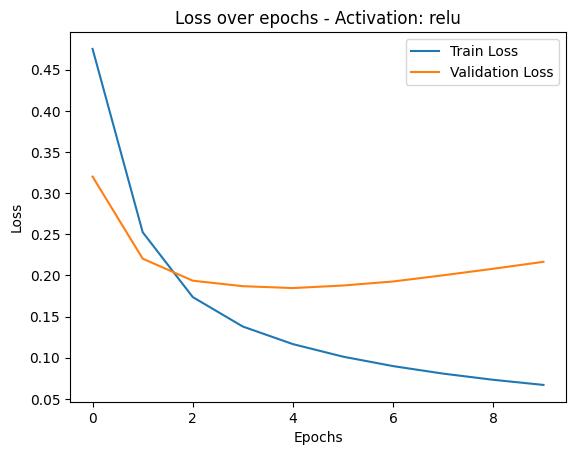

In [13]:
import matplotlib.pyplot as plt

# Plot the loss over epochs
def plot_loss(history, activation_function):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss over epochs - Activation: {activation_function}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Train a model and plot the loss
activation_function = 'relu'  # You can change this to 'sigmoid' or 'tanh' as well
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation=activation_function))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

# Plot the loss
plot_loss(history, activation_function)


### Evaluation of the Loss Plot (ReLU Activation)

The plot shows the **train loss** and **validation loss** over the epochs for a model with the ReLU activation function. Here's the evaluation of the plot:

1. **Initial Drop**: The train loss decreases sharply in the first few epochs, indicating that the model is learning quickly from the training data.
   
2. **Train Loss**: The train loss continues to decrease steadily as the epochs progress, which is a good sign of the model fitting well to the training data.

3. **Validation Loss**: The validation loss initially decreases but then flattens around epoch 3 and slightly increases after that. This could be an indication of **overfitting**, where the model starts to perform worse on unseen data while continuing to improve on the training set.

4. **Convergence**: There is a gap between the train and validation loss from epoch 3 onward. This suggests that the model may have started to overfit, as it performs better on the training set than on the validation set.

5. **Potential Action**: To avoid overfitting, techniques like **early stopping**, **dropout**, or **regularization** could be applied to improve the generalization of the model.
